# Assignment 3 : Logistic Regression

In this assignment you have to use the logistic regression technique you learned in the week 3 of the prescribed course. You have to use numpy to complete the assignment

#### Import other the libraries here

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

##### Define these functions here:
- Sigmoid function: `def sigmoid(x):`

In [2]:
def sigmoid(x):
    a = np.exp(-x)
    x = (1 / (1 + a))
    return x

- cost function: `def cost_fn(x,y,theta):` (refer to the course)

In [3]:
def cost_fn(x, y, theta):
    a = np.dot(x)
    h = sigmoid(a)
    cost = 0
    #cost_mat = -(1 / 2 * (x.shape[1]-1)) * (y * np.log(1-h) + (1-y) * np.log(h))
    for i in np.array(np.where(y==1))[0]:
        cost += np.sum(-(1 / (2 * (x.shape[1])) * (np.log(h[i]))))
    for i in np.array(np.where(y==0))[0]:
        cost += np.sum(-(1 / (2 * (x.shape[1])) * (np.log(1-h[i]))))                      
    #cost = np.sum(cost_mat)
    return cost

- Gradient descent: `def gradient_descent(X, y, theta, learning_rate=1, iters):`

$\frac{\partial J}{\partial \theta} = \frac{1}{m} \Sigma_{i=1}^m ((h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})$

$\theta_{j+1}^{(i)} = \theta_j^{(i)} - \frac{1}{m} \Sigma_{i=1}^m ((h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})$

Since these are for each element of your matrix. The final expression will be: (if using matrices)
$\theta_{j+1} = \theta_j - \frac{1}{m} \Sigma_{i=1}^m ((h_\theta(x)-y)x_j)$

You have to initialise $\theta$ and update it at each iteration according to this gradient descent equation

In [58]:
def gradient_descent(X, y, theta, iters, learning_rate = 1):
    for i in range(iters):
        a = np.dot(X, theta)
        theta = theta - (learning_rate / (X.shape[0])) * np.dot(X.T, (sigmoid(a) - y))
    return theta

- Predict: `def predict(X, y, theta, learning_rate=1, iters)`:

In [55]:
def predict(X, y, theta, iters, learning_rate = 1):
    H_X=np.zeros((X.shape[0],10), dtype=float)
    for i in range(10):
        Y = np.ones([5000,1])
        Y = np.where(y==i, Y, [0])
        theta = np.ones([401,1])
        theta = gradient_descent(X, Y, theta, iters, learning_rate)
        #print(cost_fn(X, Y, theta))
        z = np.dot(X, theta)
        H_X[:,i]=z.reshape(5000,)
    prediction = np.argmax(H_X, axis = 1)
    return prediction

### Load MNSIT data here

There are two file, X.csv and y.csv.
You have to load these csv files (read about csv in python) and store them in python variables. 
There are 5000 images, each line in X.csv is an image (pixels of image of size 20x20 are concatenated to size 400x1) and each line is y.csv is the label of that image (label in n-th line in y.csv corresponds to image in n-th line in X.csv)

In [40]:
X = np.loadtxt("X.csv", delimiter=",")
y = np.loadtxt("y.csv", delimiter = ",")
X = np.reshape(X,(5000,400))

Now your task is to:
1. Reshape these to 20x20 and show any 5 of them (random) here. 
2. For regression, you have to use the 400x1 data only. (X will be a 5000x400 matrix and y will be a 1x400 matrix)
3. Get you prediction and compare it with the labels in y
4. Calculate the error %

6.8799999999999955 % error


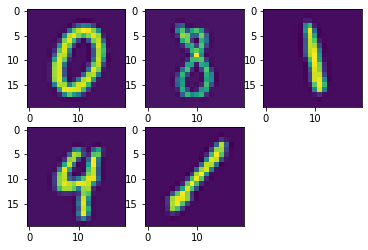

In [64]:
f = plt.figure()
for i in range(1, 6):
    f.add_subplot(2, 3, i)
    plt.imshow(np.reshape(X[np.random.randint(5000)], (20, 20)).T)
y = np.reshape(y, [5000, 1])
x = np.hstack((np.ones([5000, 1]),X))
prediction = predict(x, y, np.ones([401,1]), 1000, 1)
wrong = 0
for i in range(5000):
    if prediction[i] == y[i]:
        wrong+=1
print(100-wrong/50, "% error")

Generate the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) here and show it here: 


#### Bonus task: 
Use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to perform logistic regression (just a single function which will handle all your task :P)